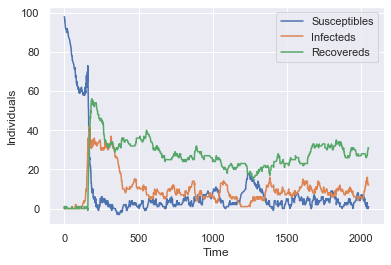

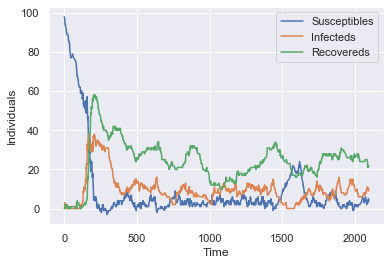

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
import pandas as pd


class Gillespie:

    def __init__(self):
        self.beta = 1/3
        self.gamma = 0.01
        self.mu = 0.003
        self.delta = 0.01
        self.epsilon = 0.001
        self.N = 100
        self.X = 99
        self.Y = 1
        self.Z = 0
        self.T = 0


    def get_rates(self, X, Y, Z):
        """
        Determine at which rate an event occurs.
        """
        rate_E1 = self.mu * self.N
        rate_E2 = self.beta * self.X * self.Y / self.N
        rate_E3 = self.gamma * self.Y
        rate_E4 = self.mu * self.X
        rate_E5 = self.mu * self.Y
        rate_E6 = self.mu * self.Z
        rate_E7 = self.delta 
        rate_E8 = self.epsilon * self.X

        events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6]

        return events

    def gillespie(self):
        """
        Choose the next time and event.
        """

        # Generate two random numbers between 0 and 1.
        random_time = np.random.rand()

        events = self.get_rates(self.X, self.Y, self.Z)

        Rtotal = sum(events)

        # Get reaction time
        tau = (1.0/Rtotal) * np.log((1.0/random_time))
        self.T += tau

        # Determine which event occurs
        # Make list of reaction intervals
        rates = []
        for i in events:
            rates.append(i/Rtotal)

        random_event = random.uniform(0, max(rates))

        # Find event to be executed based on closest number to
        # a random number in rates-array
        found = self.find_nearest(rates, random_event)

        # Retrieve which event is related to this interval
        for k in range(len(rates)):
            if rates[k] == found:
                index = k
                break

        # Birth
        if index == 0:
            self.X += 1

        # Transmission
        elif index == 1:
            self.Y += 1
            self.X -= 1

        # Recovery
        elif index == 2:
            self.Z += 1
            self.Y -= 1

        # Death
        elif index == 3:
            self.X -= 1
        elif index == 4:
            self.Y -= 1
        elif index == 5:
            self.Z -= 1
        
        # Import via immigration
        elif index == 6:
            Y += 1
            
        # Import via external infection
        else:
            Y += 1
            X -= 1

        return self.X, self.Y, self.Z, self.T

    def find_nearest(self, array, value):
        """
        Find nearest value in array.
        """

        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]


if __name__ == '__main__':

    for i in range(2):
        gillespie = Gillespie()

        plots = []
        time = []

        for j in range(1500):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)


        # plt.plot(time, Xs)
        plt.plot(time, plots)
        plt.legend(['Susceptibles', 'Infecteds', 'Recovereds'], loc="upper right")
        plt.xlabel("Time")
        plt.ylabel("Individuals")
        plt.show()


## 1. Variability
### Run several models with the same initial conditions to do a statistical analysis on variance

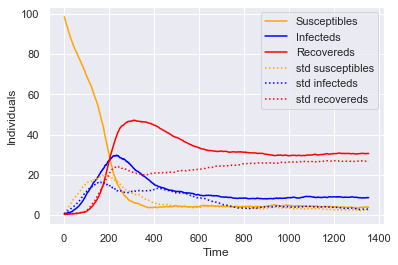

Fixed point for X =  3.74
Fixed point for Y =  8.65
Fixed point for Z =  30.55

Mean of X =  18.363609999999998 variance =  25.07726554207815
Mean of Y =  13.692169999999999 variance =  7.691122336245861
Mean of Z =  29.1107 variance =  13.075309392515345


In [20]:
totalX = []
totalY = []
totalZ = []
totalT = []

for i in range(100): 
    gillespie = Gillespie()

    plots = []
    time = []
    Xs = []
    Ys = []
    Zs = []
    Ts = []


    for j in range(1000):
        X, Y, Z, T = gillespie.gillespie()
        plots.append([X, Y, Z])
        time.append(T)
        Xs.append(X)
        Ys.append(Y)
        Zs.append(Z)
        Ts.append(T)

    totalX.append(Xs)
    totalY.append(Ys)
    totalZ.append(Zs)
    totalT.append(Ts)
    

# Calculate means
meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]

# TODO: errorbars plotten om variatie te laten zien of confidence interval (seaborn?)
plt.plot(totalT, meansX, color="orange")
plt.plot(totalT, meansY, color="blue")
plt.plot(totalT, meansZ, color="red")
plt.plot(totalT, barsX, color="orange", linestyle=":")
plt.plot(totalT, barsY, color="blue", linestyle=":")
plt.plot(totalT, barsZ, color="red", linestyle=":")
plt.legend(['Susceptibles', 'Infecteds', 'Recovereds', "std susceptibles", "std infecteds", "std recovereds"], loc="upper right")
plt.xlabel("Time")
plt.ylabel("Individuals")
plt.show()


print("Fixed point for X = ", meansX[-1])
print("Fixed point for Y = ", meansY[-1])
print("Fixed point for Z = ", meansZ[-1])
print("")
print("Mean of X = ", np.mean(meansX), "variance = ", np.std(meansX))
print("Mean of Y = ", np.mean(meansY), "variance = ", np.std(meansY))
print("Mean of Z = ", np.mean(meansZ), "variance = ", np.std(meansZ))



## 2. Covariance between S and I

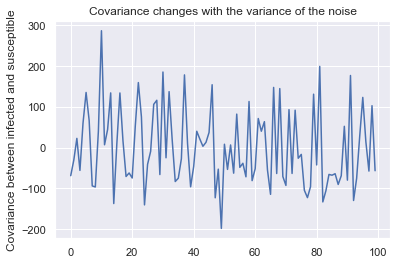

In [64]:
def covariance():
    """
    Return covariance between susceptibles (X) and infecteds (Y).
    """
    covariances = []
    for i in range(len(totalX)):
        cov = np.cov(totalX[i], totalY[i])
        covariances.append(cov[0][1])
    return covariances

# TODO: Add variance of noise to xlabel
# Show negative covariance 

plt.plot(covariance())
plt.ylabel("Covariance between infected and susceptible")
plt.title("Covariance changes with the variance of the noise")
plt.show()

    

## 3. Increased transients
### For stochastic models, we need to consider both the long-term behavior and the short-term “transient” dynamics.

## 4. Stochastic resonance

## 5. Extinction

In [120]:

def extinction(beta,gamma,mu):
    R0 = beta / (gamma + mu)
    Pext = 1 / R0
    return Pext


# Runs 2 simulations, prints covariance and P(extinction)
S = []
I = []
n = 5
beta, gamma, mu = 1/3, 0.01, 0.003

for i in range(n):
    
    gillespie = Gillespie()
    
    sus = []
    inf = []
    
    for i in range(100):
        X,Y,Z,T = gillespie.gillespie()
        sus.append(X)
        inf.append(Y)
    S.append(sus)
    I.append(inf)

print("covariance = ", covariance(S, I, n))
print("P extinction = ", extinction(beta, gamma, mu))

covariance =  -13.784646464646473
P extinction =  0.03900000000000001


# 2. Meta-populations

## Consider two large, fully susceptible populations, with ρii = 1 and ρij < 1. Assume the populations are of the same size, and ignore demography.
### --> What is the effect of the coupling between the two populations, are there any delays?

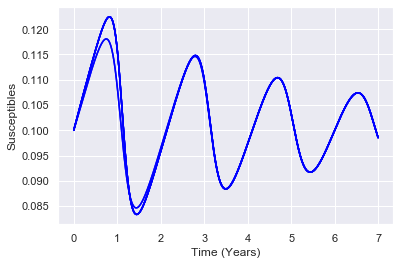

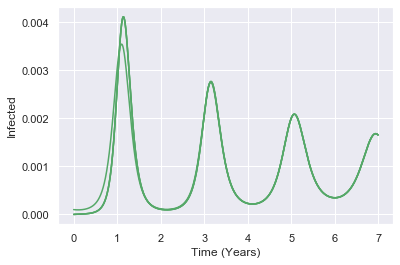

In [99]:
import scipy.integrate as spi

# Number of sub-populations
n = 4

beta = 1.0*np.ones(n)
gamma = 0.1*np.ones(n)
nu = 0.0001*np.ones(n)
mu = 0.0001*np.ones(n)
X0 = 0.1*np.ones(n)
Y0=0.0*np.ones(n)
Y0[0]=0.0001
m = 0.001*np.ones((n,n))
m = m - np.diag(np.diag(m))
ND = 7 * 365

def diff_eqs(INP,t):  
    """
    Main set of equations in the SIR model with metapopulations. 
    """

    Y = np.zeros((2*n))
    V = INP   

    for i in range(n):
        Y[i] = nu[i] - beta[i]*V[i]*V[n+i] - mu[i]*V[i]; 
        Y[n+i] = beta[i]*V[i]*V[n+i] - mu[i]*V[n+i] - gamma[i]*V[n+i]

        for j in range(n):
            Y[i] += m[i][j]*V[j] - m[j][i]*V[i];
            Y[n+i] += m[i][j]*V[n+j] - m[j][i]*V[n+i];
    return Y

t_range = np.arange(t_start, ND, 1)
solution = spi.odeint(diff_eqs, np.hstack((X0,Y0)), t_range)


for i in range(n):
    plt.plot(t_range/365.0, solution[:,i], color='blue')
plt.xlabel('Time (Years)')
plt.ylabel('Susceptibles')
plt.show()

for i in range(n):
    plt.plot(t_range/365.0, solution[:,i+n], color='g')
plt.ylabel('Infected')
plt.xlabel('Time (Years)')
plt.show()



